In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
class BayesianBandit:
    def __init__(self, true_mean, name):
        self.true_mean = true_mean
        # parameters for mu - prior is N(0,1)
        self.predicted_mean = 0
        self.lambda_ = 1
        self.sum_x = 0 # for convenience
        self.tau = 1
        self.name = name

    def pull(self):
        return np.random.randn() + self.true_mean

    def sample(self):
        return np.random.randn() / np.sqrt(self.lambda_) + self.predicted_mean

    def update(self, x):
        self.lambda_ += self.tau
        self.sum_x += x
        self.predicted_mean = self.tau*self.sum_x / self.lambda_

In [20]:
def run_exp(m1_mean,m2_mean,m3_mean,N):
    
    #Create Bandits with given mean
    m1 = BayesianBandit(m1_mean,"m1")
    m2 = BayesianBandit(m2_mean,"m2")
    m3 = BayesianBandit(m3_mean,"m3")
    
    bandits = [m1,m2,m3]
    data = np.empty(N)
    cum_reward = 0.0 
    for i in range(N):
        #Chose the one that has max reward
        idx = np.argmax([b.sample() for b in bandits])
        
        reward = bandits[idx].pull()
        bandits[idx].update(reward)
        data[i] = reward
        
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

    # plot moving average ctr
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1_mean)
    plt.plot(np.ones(N)*m2_mean)
    plt.plot(np.ones(N)*m3_mean)
    plt.xscale('log')
    plt.show()
    for b in bandits:
        print(b.name, b.predicted_mean)

    return cumulative_average

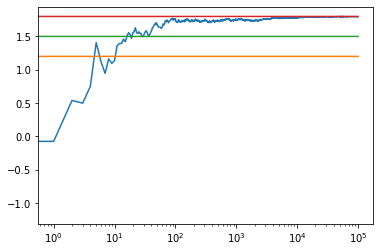

m1 1.3273726446651215
m2 1.4229524028366225
m3 1.796556178979657


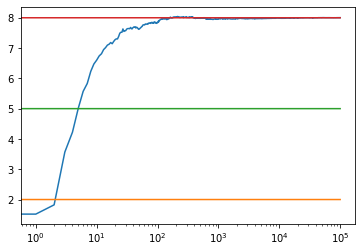

m1 1.3682421947391232
m2 0
m3 8.004010192191927


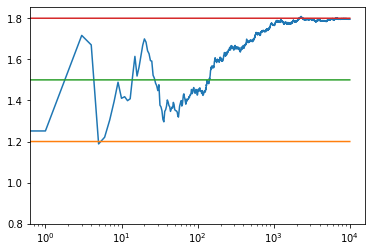

m1 1.2362613671039933
m2 0.7659362067701435
m3 1.7993690422564534


C:\Users\aanishsingla\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\pylabtools.py:122: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


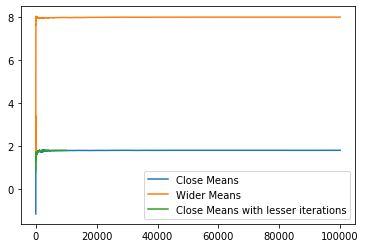

In [21]:
if __name__ == '__main__':
    c_1 = run_exp(1.2, 1.5, 1.8,  100000)
    c_05 = run_exp(2, 5, 8, 100000)
    c_01 = run_exp(1.2, 1.5, 1.8, 10000)
    # linear plot
    plt.plot(c_1, label='Close Means')
    plt.plot(c_05, label='Wider Means')
    plt.plot(c_01, label='Close Means with lesser iterations')
    plt.legend()
    plt.show()